# Running example of the pipeline
## Date chosen: 13_10_2023

Observational data can be downloaded from the Vidojevica repository. The date 13_10_2023 has been chosen as a working example and we encourage users to download it. Pipeline can be used with any other date as well, but for this particular date we have created two additional files that will show the full capability of the pipeline: 
1. katalog.cat where celestial coordinates of observational targets are listed and
2. Mrk335_stars.txt where the coordinates of one of the targets Mrk335 are provided along with the choosen comparison stars.

User should navigate to this directory (13_10_2023) and FROM INSIDE IT clone the github repository and then copy two files (katalog.cat and Mrk335_stars.txt) from the pipeline repository to directory 13_10_2023

In [1]:
# git clone https://github.com/anavudragovic/pipeline

Another directory called pipeline is created inside 13_10_2023 directory with the pipeline itself, but also with this jupyter notebook.

The user should navigate to pipeline directory: cd pipeline/ and from there start: jupyter notebook. The repository will open in a browser and the user should double-click example.ipynb (this notebook). Now everything is set and the user can continue to read and run lines bellow.

In [1]:
cd ../

/home/ana/Dropbox/lsst/09_10_2023


In [3]:
pwd

'/home/ana/Dropbox/lsst/09_10_2023'

In [4]:
run pipeline/reduce.py -c -b -s


========= CALIBRATION START: 2024-11-24 17:25:47.199756 ===========


----------------------- MAKE MASTER BIAS FRAME: 2024-11-24 17:25:47.199793------------------------

Reading master bias: mBias.fits


----------------------- MAKE MASTER DARK FRAME: 2024-11-24 17:25:47.200210------------------------

Reading master dark: mDark_5sec.fits

Reading master dark: mDark_600sec.fits


----------------------- MAKE MASTER FLAT FRAME: 2024-11-24 17:25:47.201035------------------------

Reading master flat: mFlat_B.fits

Reading master flat: mFlat_Ha.fits

Reading master flat: mFlat_HaContinuum.fits

Reading master flat: mFlat_I.fits

Reading master flat: mFlat_L.fits

Reading master flat: mFlat_R.fits

Reading master flat: mFlat_SII.fits

Reading master flat: mFlat_V.fits


----------------------- DO CLASSIC CALIBRATION: 2024-11-24 17:25:47.211262------------------------

Calibration of LIGHT frames is already done


----------------------- BAD PIXEL CORRECTION: 2024-11-24 17:25:47.211525----

Calibration results should be visually check specifically the master skyflat image. It must not contain any light sources.

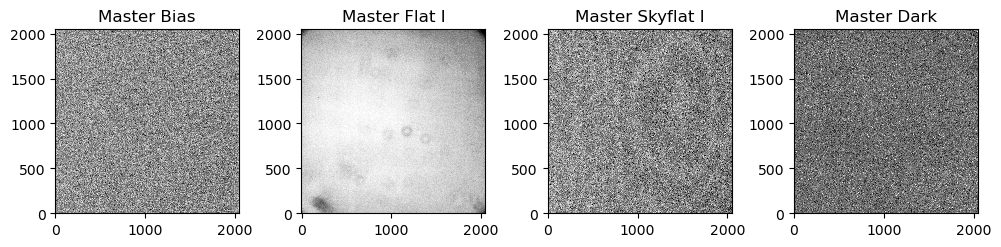

In [7]:
from astropy.io import fits
import matplotlib.pylab as pl
from astropy.visualization import ZScaleInterval

biasFile =  fits.open('calibration/mBias.fits')
flatIFile = fits.open('calibration/mFlat_I.fits')
skyIFile = fits.open('calibration/mSkyflat_I.fits')
darkFile = fits.open('calibration/mDark_600sec.fits')
bias = biasFile[0].data
flatI = flatIFile[0].data
skyI = skyIFile[0].data
dark = darkFile[0].data
z = ZScaleInterval()
zminb,zmaxb = z.get_limits(bias)
zminf,zmaxf = z.get_limits(flatI)
zmins,zmaxs = z.get_limits(skyI)
zmind,zmaxd = z.get_limits(dark)

fig, (ax1, ax2, ax3, ax4) = pl.subplots(figsize=(10, 4), nrows=1, ncols=4)
fig.tight_layout() 
ax1.imshow(bias, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest'); ax1.set_title('Master Bias');
ax2.imshow(flatI, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest'); ax2.set_title('Master Flat I');
ax3.imshow(skyI, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest'); ax3.set_title('Master Skyflat I');
ax4.imshow(dark, origin='lower', cmap='Greys_r', vmin=zmind, vmax=zmaxd, interpolation='nearest'); ax4.set_title('Master Dark');

After data reduction one needs to proceed with photometry (-p) that requires astrometric solution of all the images (-a). Since the pipeline has beed started it has changed the working directory to the one with raw data. So, from now on each time user wants to run a script it's path has been changed with respect to the current (data) directory and when the pipeline is called it is one directory above (../reduce.py). 

Depending on the corrections applyed, there are two options to proceed:

1. If the user wants to measure photometry on the images corrected to the background sky gradient, he/she proceeds with

In [8]:
# run pipeline/reduce.py -b -a -p -l

In [ ]:
2. If this correction seems unnecessary, one should proceed with:

In [11]:
run pipeline/reduce.py -a -p -l